# Food Price Prediction in Indonesia

This project aim to predict food price in Indonesia based on the past data collect from several markets all over the country

### Data and Data Source

- The dataset used for this projects is Food Price (Indonesia) dataset. 
- The dataset can be accessed at https://data.humdata.org/dataset/wfp-food-prices-for-indonesia


- This dataset contains Food Prices data for Indonesia, sourced from the World Food Programme Price Database. The World Food Programme Price Database covers foods such as maize, rice, beans, fish, and sugar for 98 countries and some 3000 markets. It is updated weekly but contains to a large extent monthly data. The data goes back as far as 1992 for a few countries, although many countries started reporting from 2003 or thereafter.

### Objective Statements

- Identifying the trend of commodity price that represented by the dataset.

- Predicting future value of the time series data (forecasting) 


source: https://www.albany.edu/~reinhold/m565/NotesTimeSeries.doc#:~:text=There%20are%20two%20main%20goals,of%20the%20time%20series%20variable).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Import Libraries




In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import warnings
from numpy import sqrt 
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action="ignore", category=FutureWarning)

# #1. Preliminary Flow




### Load Data

In [20]:
# load data
foodprice = pd.read_csv('/content/foodprice.csv')
foodprice.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2007,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Rice,KG,actual,Retail,IDR,5941.98,0.6530
1,1/15/2007,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Wheat flour,KG,actual,Retail,IDR,4328.26,0.4756
2,1/15/2007,NaN,NaN,National Average,NaN,NaN,"meat, fish and eggs",Eggs,KG,actual,Retail,IDR,9150.74,1.0056
3,1/15/2007,NaN,NaN,National Average,NaN,NaN,"meat, fish and eggs",Meat (beef),KG,actual,Retail,IDR,49165.11,5.4029
4,1/15/2007,NaN,NaN,National Average,NaN,NaN,"meat, fish and eggs","Meat (chicken, broiler)",KG,actual,Retail,IDR,20122.80,2.2114


**Observation**: Some columns have `Nan` Value

In [21]:
foodprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41957 entries, 0 to 41956
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       41957 non-null  object 
 1   admin1     40294 non-null  object 
 2   admin2     40294 non-null  object 
 3   market     41957 non-null  object 
 4   latitude   40293 non-null  float64
 5   longitude  40293 non-null  float64
 6   category   41956 non-null  object 
 7   commodity  41956 non-null  object 
 8   unit       41956 non-null  object 
 9   priceflag  41956 non-null  object 
 10  pricetype  41956 non-null  object 
 11  currency   41956 non-null  object 
 12  price      41956 non-null  float64
 13  usdprice   41956 non-null  float64
dtypes: float64(4), object(10)
memory usage: 4.5+ MB


**Observation**: 
- There are total 13 columns, with some column with missing values.
- There are 41.956 rows of data including data from 2007 until 2021

# #2. Pre-Processing Data

### Feature Selection

Not all columns will be used for further anlaysis. This project will focused on the data price, and giving assumption that all prices already in IDR (Rupiah), The columns (features) that will be used are:
- `date` : the date of price data recorded from market
- `market`: All the market in Indonesia choosen to collect data
- `category`: the category of commodity
- `commodity`: the name of commodity
- `unit`: the measurements of commodity
- `priceflag`: there are 2 type of priceflag, aggregate and actual
- `pricetype`: the data collected is in retail price type
- `price` : the price of commodity (IDR)



In [22]:
# Drop unused features
foodprice.drop('admin1', axis=1, inplace=True)
foodprice.drop('admin2', axis=1, inplace=True)
foodprice.drop('latitude', axis=1, inplace=True)
foodprice.drop('longitude', axis=1, inplace=True)
foodprice.drop('currency', axis=1, inplace=True)
foodprice.drop('usdprice', axis=1, inplace=True)

In [23]:
foodprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41957 entries, 0 to 41956
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       41957 non-null  object 
 1   market     41957 non-null  object 
 2   category   41956 non-null  object 
 3   commodity  41956 non-null  object 
 4   unit       41956 non-null  object 
 5   priceflag  41956 non-null  object 
 6   pricetype  41956 non-null  object 
 7   price      41956 non-null  float64
dtypes: float64(1), object(7)
memory usage: 2.6+ MB


**observation**: unused features are deleted, now there are 7 features.

### Handling Missing Value


In [24]:
foodprice.isna().sum()

date         0
market       0
category     1
commodity    1
unit         1
priceflag    1
pricetype    1
price        1
dtype: int64

**observation**: There are missing values.

In [25]:
#drop missing value
foodprice2 = foodprice.dropna()
foodprice2.head()

,date,market,category,commodity,unit,priceflag,pricetype,price
0,1/15/2007,National Average,cereals and tubers,Rice,KG,actual,Retail,5941.98
1,1/15/2007,National Average,cereals and tubers,Wheat flour,KG,actual,Retail,4328.26
2,1/15/2007,National Average,"meat, fish and eggs",Eggs,KG,actual,Retail,9150.74
3,1/15/2007,National Average,"meat, fish and eggs",Meat (beef),KG,actual,Retail,49165.11
4,1/15/2007,National Average,"meat, fish and eggs","Meat (chicken, broiler)",KG,actual,Retail,20122.80


In [26]:
#check missing value again to make sure
foodprice2.isna().sum()

date         0
market       0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
price        0
dtype: int64

**Observation**: Now there are no Missing Values

# #3. Exploratory Data Analysis

## Market, Category, and Commodities

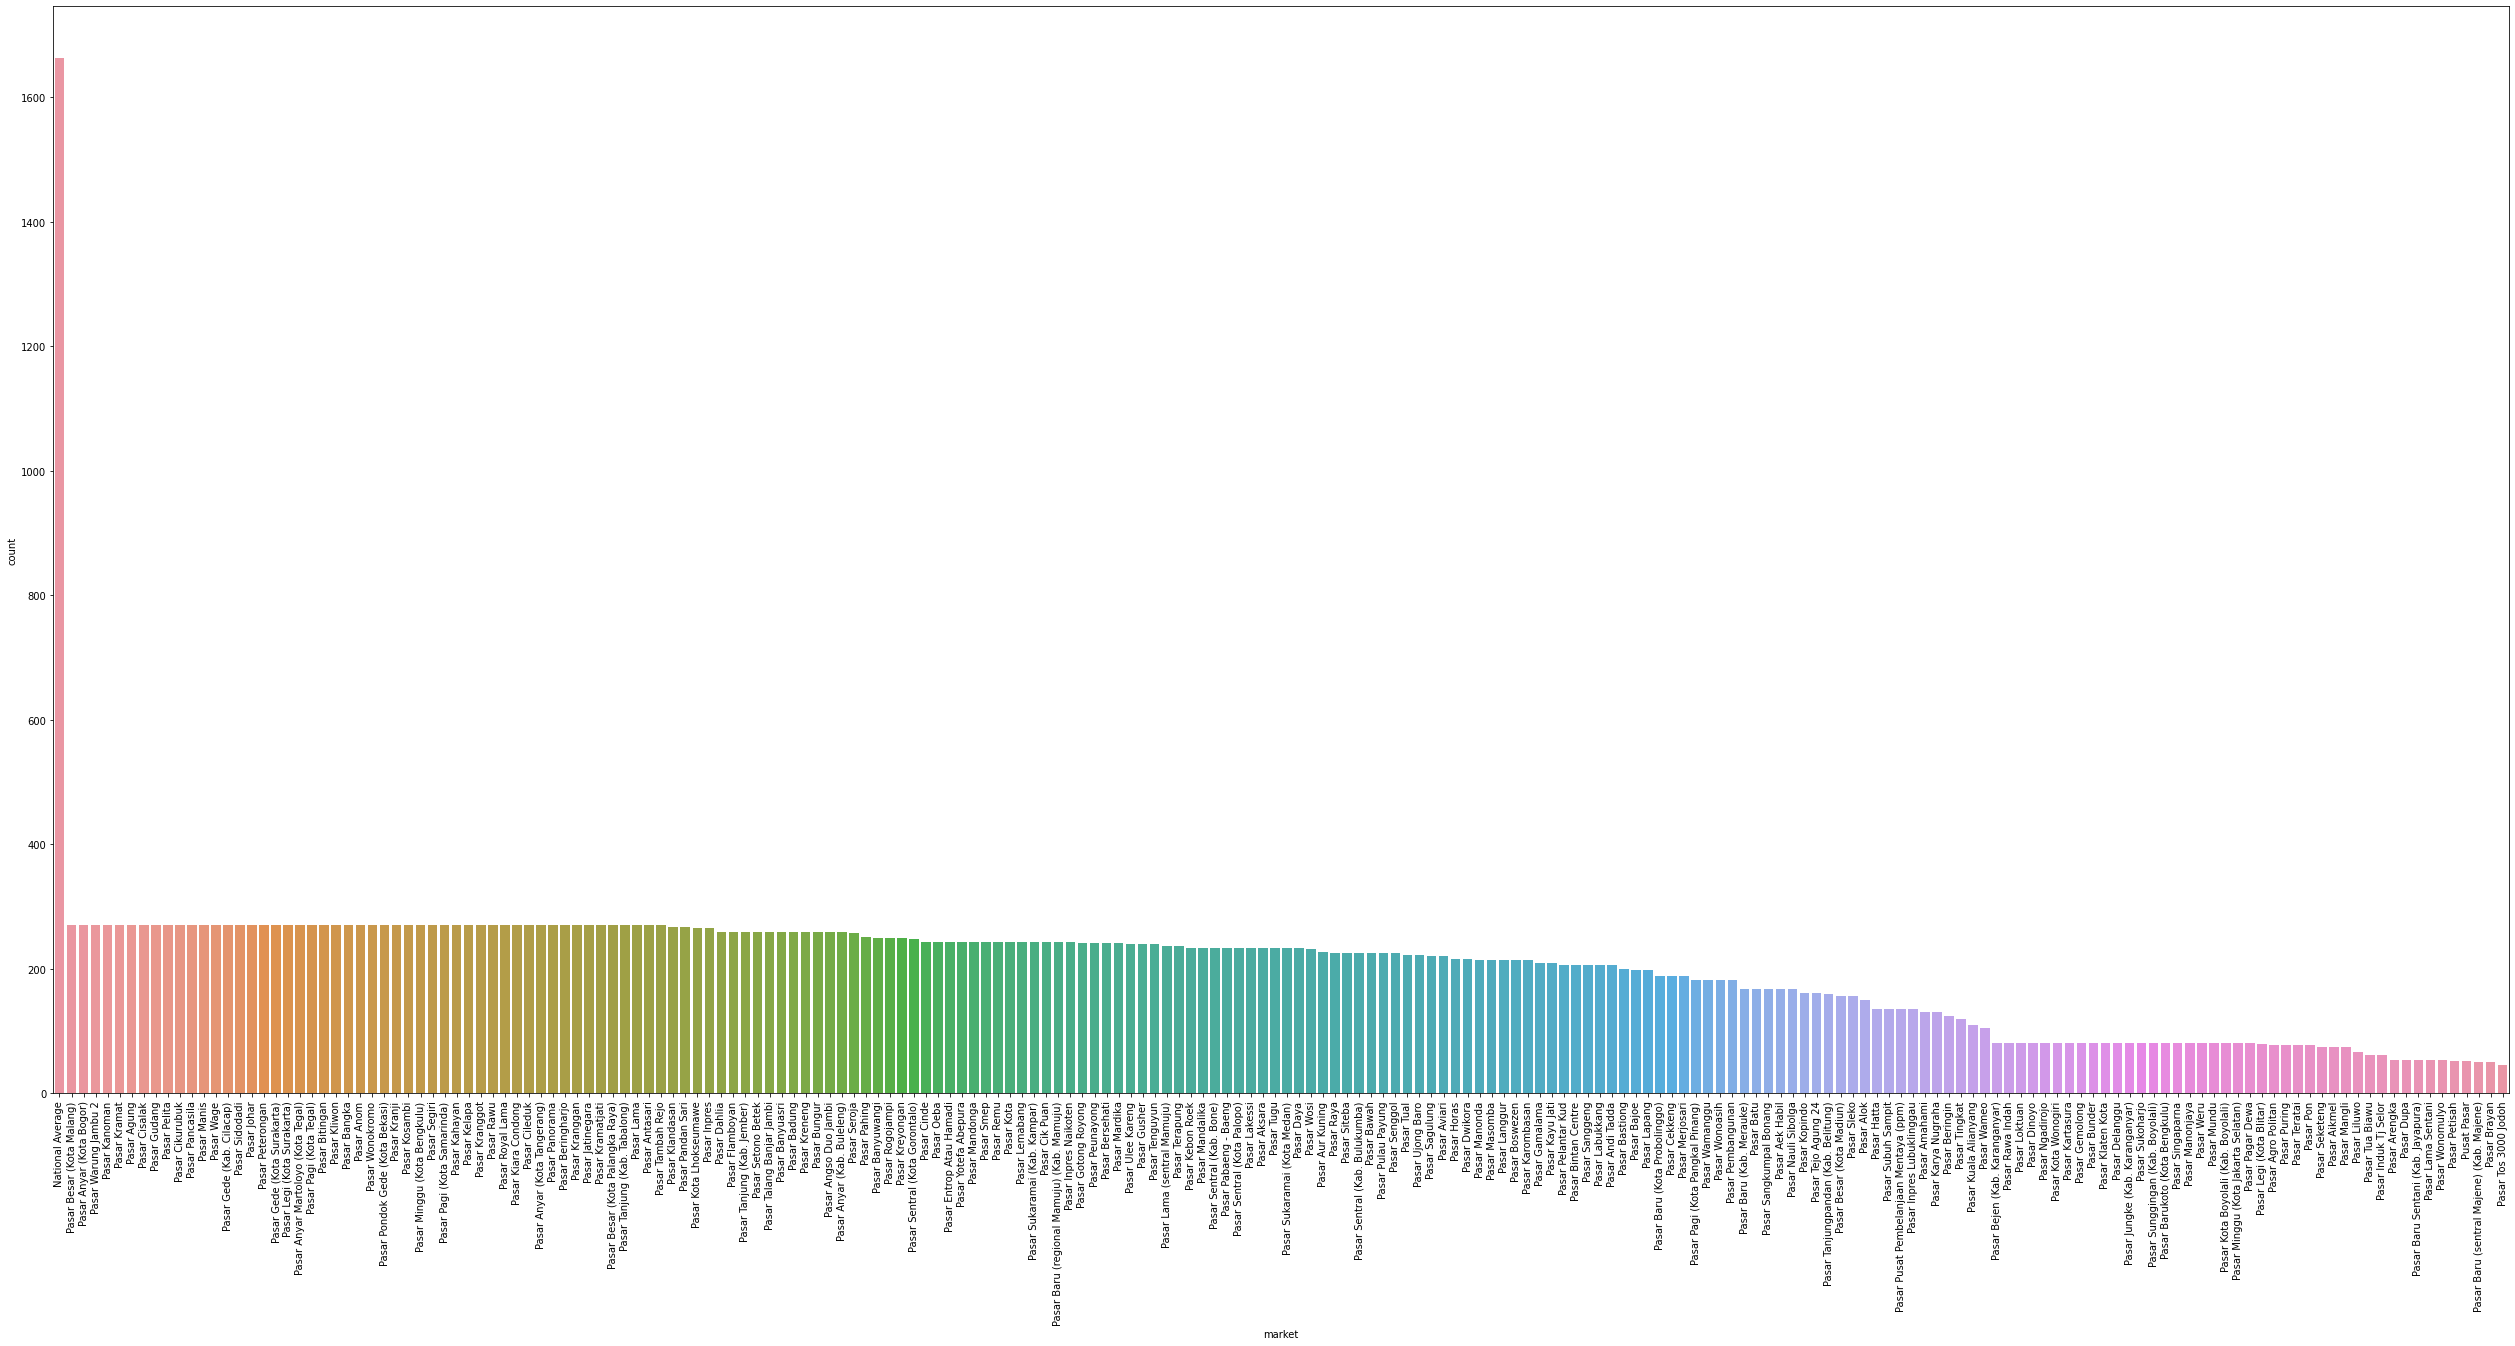

In [27]:
# Explore `market` in dataset
plt.figure(figsize=(44,20))
sns.countplot(foodprice2['market'], order = foodprice2['market'].value_counts().index[::1])
plt.xticks(rotation=90)
plt.show()

**Observation:** 
- Every markets has different  numbers of commodity available to be recorded.
- Pasar Besar (Malang, East Java) has the most complete commodities available to be recorded
- Pasar Tos Jodoh 3000 (Batam) has the least commodities available to be recorded.

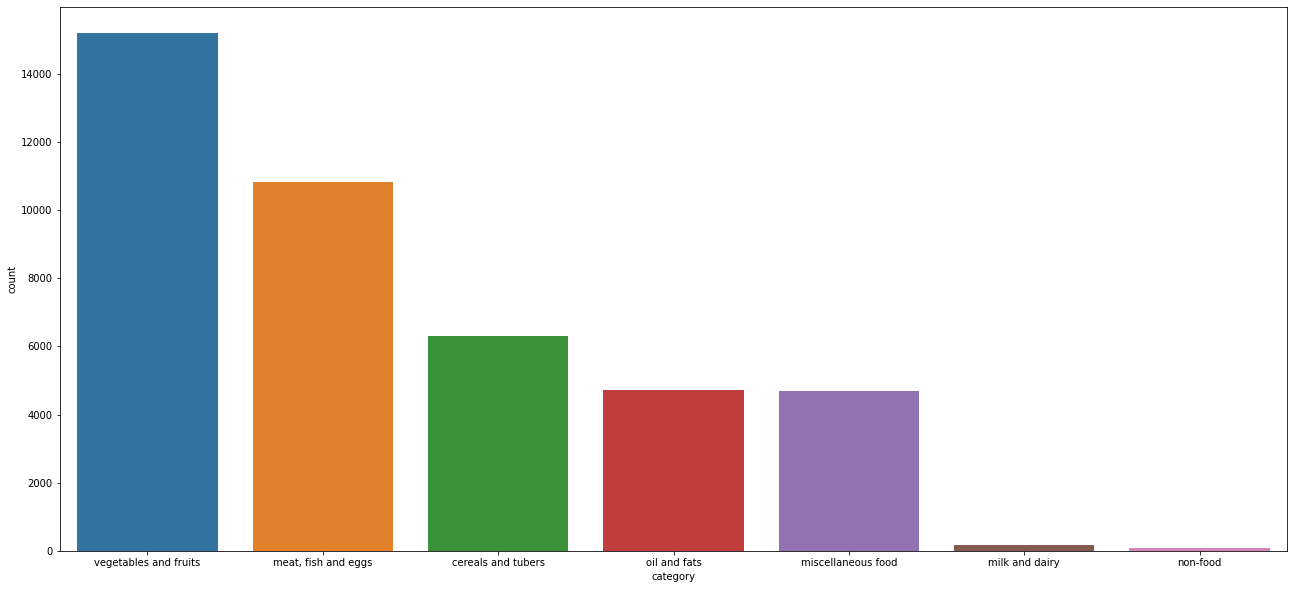

In [28]:
#Explore food category in dataset
plt.figure(figsize=(22,10))
sns.countplot(foodprice2['category'], order = foodprice2['category'].value_counts().index[::1])
plt.show()

**Observation**: 
There are 7 food categories of commodity:
- vegetables and fruits
- meat, fish and eggs
- cereals and tubers
- oil and fats
- miscellaneous food
- meat, fish and eggs
-  milk and dairy
- non-food

Because not all commodities recorded in each market, the numbers of commodity different on each categories.

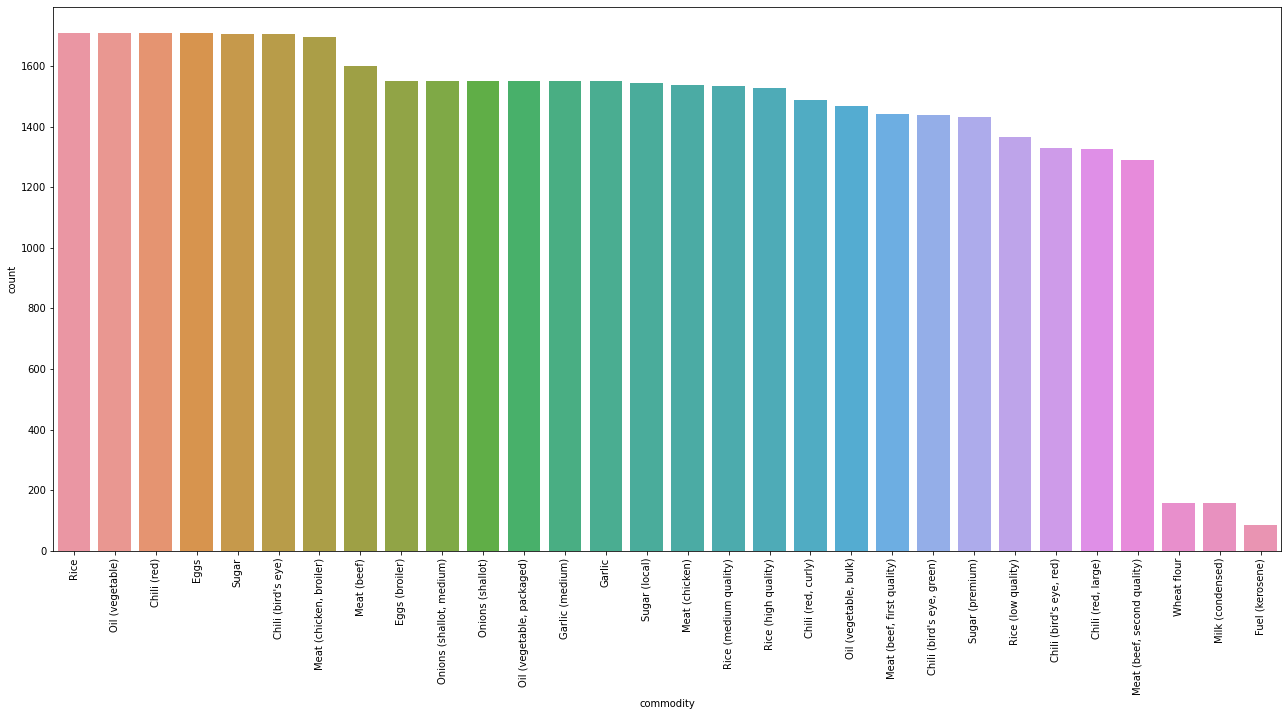

In [29]:
#Explore food category in dataset
plt.figure(figsize=(22,10))
sns.countplot(foodprice2['commodity'], order = foodprice2['commodity'].value_counts().index[::1])
plt.xticks(rotation=90)
plt.show()

**Observation**: There are 25 price commodities collected: 

1. Rice
2. Wheat flour
3. Eggs
4. Meat
5. Milk (condensed)
6. Sugar
7. Fuel (kerosene)
8. Oil (vegetable)
9. Chili (bird's eye)
10. Chili (red)
11. Rice (high quality)
12. Rice (low quality)
13. Rice (medium quality)
14. Eggs (broiler)
15. Meat (beef, first quality)
16. Meat (chicken)
17. Sugar (local)
18. Sugar (premium)
19. Garlic
20. Garlic (medium)
21. Onions (shallot)
22. Onions (shallot, medium)
23. Meat (beef, second quality)
24. Chili (bird's eye, red)
25. Chili (red, large)


In [30]:
foodprice2["date"] = pd.to_datetime(foodprice2["date"])
foodprice2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41956 entries, 0 to 41955
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       41956 non-null  datetime64[ns]
 1   market     41956 non-null  object        
 2   category   41956 non-null  object        
 3   commodity  41956 non-null  object        
 4   unit       41956 non-null  object        
 5   priceflag  41956 non-null  object        
 6   pricetype  41956 non-null  object        
 7   price      41956 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 3.9+ MB


<ipython-input-30-6bbaf76e5a9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foodprice2["date"] = pd.to_datetime(foodprice2["date"])


## Price Range in Box Plot

[Text(0, 0, 'Cereals and Tubers'),
 Text(0, 0, 'Meat, Fish and Eggs'),
 Text(0, 0, 'Milk and Dairy'),
 Text(0, 0, 'Miscellaneous Food'),
 Text(0, 0, 'Non-Food'),
 Text(0, 0, 'Oil and Fats'),
 Text(0, 0, 'Vegetable and Fruits')]

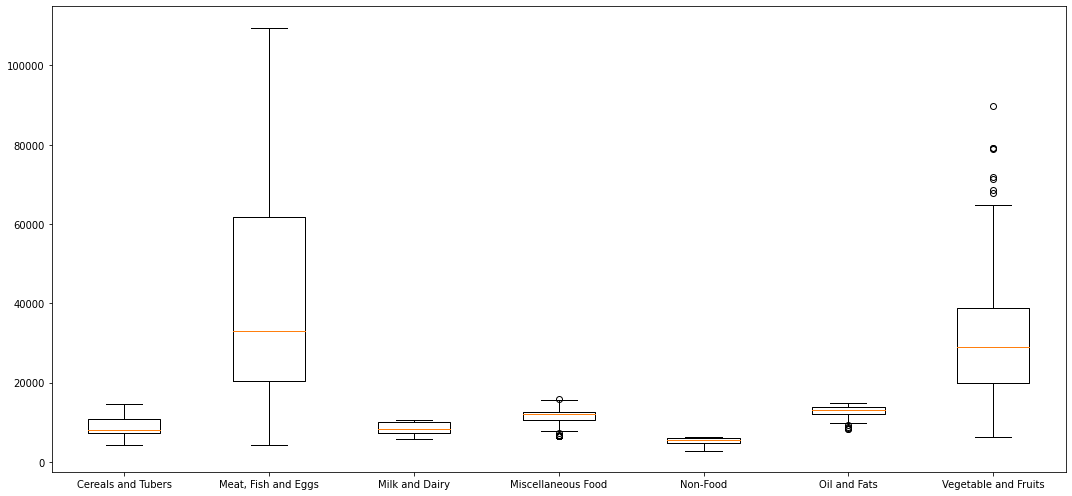

In [221]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)                
my_dict = {'Cereals and Tubers': category1['price'], 'Meat, Fish and Eggs': category2['price'], 'Milk and Dairy': category3['price'], 'Miscellaneous Food': category4['price'], 'Non-Food': category5['price'], 'Oil and Fats': category6['price'], 'Vegetable and Fruits': category7['price']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

# #4. Analysis & Modelling


Analysis: 
- Based on many reference, each category of commodities have different seasonality. This use case will split dataset into category dataset and analyze it separately.

- The first step in the process of **trend identification** is smoothing. The most common technique is moving average smoothing which replaces each element of the series by either the simple or weighted average.

- In this case, Moving Average  method are used. Moving average is the average value over the previous n time periods. As you move forward in time, the oldest time period is dropped from the analysis

- To simplify the calculation, this use case will 12 Month Moving Average for each category's commodity.



Modelling

- There are various model to forecast time series data. The most common models are Exponential Smoothing. 

- This case will use **Simple Exponential Smoothing** as the basis model, and **HoltWinters (Triple Exponential Smoothing)** for handling trend and seasonality.

- The model will be used to forecast  future value of time series data.





## #Category 1: Cereals and Tubers

### Creates Categorical Dataset

In [149]:
# split dataset for category in National Average
category1 = foodprice2[(foodprice2.market == "National Average") & (foodprice2.category == "cereals and tubers")]
category1.tail(10)

,date,market,category,commodity,unit,priceflag,pricetype,price
1613,2019-11-15,National Average,cereals and tubers,Rice,KG,actual,Retail,13995.0
1614,2019-11-15,National Average,cereals and tubers,Wheat flour,KG,actual,Retail,8432.0
1623,2019-12-15,National Average,cereals and tubers,Rice,KG,actual,Retail,14019.0
1624,2019-12-15,National Average,cereals and tubers,Wheat flour,KG,actual,Retail,8478.0
1633,2020-01-15,National Average,cereals and tubers,Rice,KG,actual,Retail,14139.0
1634,2020-01-15,National Average,cereals and tubers,Wheat flour,KG,actual,Retail,8503.0
1643,2020-02-15,National Average,cereals and tubers,Rice,KG,actual,Retail,14188.0
1644,2020-02-15,National Average,cereals and tubers,Wheat flour,KG,actual,Retail,8481.0
1653,2020-03-15,National Average,cereals and tubers,Rice,KG,actual,Retail,14209.0
1654,2020-03-15,National Average,cereals and tubers,Wheat flour,KG,actual,Retail,8478.0


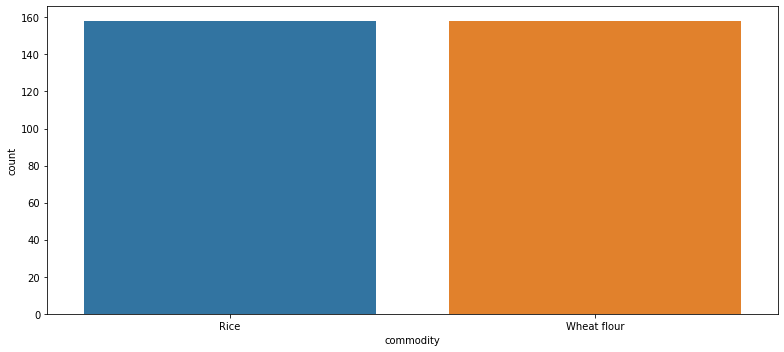

In [150]:
#Explore food category in dataset
plt.figure(figsize=(11,5))
sns.countplot(category1['commodity'], order = category1['commodity'].value_counts().index[::1])
plt.show()

**Observation:**
Category 'Cereals and Tubers' consist of 2 (two)commodities:
- Rice in Kilograms units
- Wheat Flour in Kilograms units

### Trend Analysis: Moving Average

- The first step in the process of trend identification is smoothing. The most common technique is moving average smoothing which replaces each element of the series by either the simple or weighted average.

- In this case, Moving Average  method are used. Moving average is the average value over the previous n time periods. As you move forward in time, the oldest time period is dropped from the analysis

- To simplify the calculation, this use case will 12 Month Moving Average for each category's commodity..


In [151]:
# create 12 month moving average
category1['Average'] = category1['price'].rolling(12).mean()
pd.options.mode.chained_assignment = None  # default='warn'

# plot the data and MA
import plotly.express as px
fig = px.line(category1, x="date", y=["price", "Average"], template = 'plotly_dark')
fig.show()


#sumber: https://pycaret.gitbook.io/docs/learn-pycaret/official-blog/time-series-101-for-beginners

In [152]:
category1.describe()

,price,Average
count,316.000000,305.000000
mean,9012.236487,9041.131798
std,2631.031650,1739.372198
min,4328.260000,5249.750000
25%,7344.000000,7470.480833
50%,8001.500000,9137.166667
75%,10890.000000,10595.000000
max,14697.000000,11277.000000


**Observation:**
- The chart shows that the actual price (`price`) have trend and seasonality.
- Moving avareges (`averages`) give smoother line, but also shows same trend.
- Commodity prices in this category have increased throughout the year from IDR 4.328 in 2007 to IDR 14.697 in 2020.
- Moving averages also shows the price keep moving up in range between IDR 5.249 in 2007 until IDR 11.277 in 2020

### Pre-processing Forecasting Modelling




In [153]:
# extract month and year from dates**
pd.options.mode.chained_assignment = None  # default='warn'
category1['Month'] = [i.month for i in category1['date']]
category1['Year'] = [i.year for i in category1['date']]

# create a sequence of numbers
category1['Series'] = np.arange(1,len(category1)+1)

# drop unnecessary columns and re-arrange
category1.drop(['date', 'Average'], axis=1, inplace=True)
category1 = category1[['Series', 'Year', 'Month', 'category', 'commodity', 'unit', 'price']] 

# check the head of the dataset**
category1.tail()

,Series,Year,Month,category,commodity,unit,price
1634,312,2020,1,cereals and tubers,Wheat flour,KG,8503.0
1643,313,2020,2,cereals and tubers,Rice,KG,14188.0
1644,314,2020,2,cereals and tubers,Wheat flour,KG,8481.0
1653,315,2020,3,cereals and tubers,Rice,KG,14209.0
1654,316,2020,3,cereals and tubers,Wheat flour,KG,8478.0


**Observation**: `date` has been extract to `Month`, `Year`, and `Series`

In [154]:
# split data into train-test set
train = category1[category1['Year'] <= 2018]
test = category1[category1['Year'] > 2018]

# check shape
train.shape, test.shape

((286, 7), (30, 7))

**Observation**: Data split into:
- train data including data from 2007 to 2018 (80%); and 
- test data including data from 2007 to 2020 (20%) 

### Model #1 SES

Simple Exponential Smoothing

In [155]:
from statsmodels.tsa.api import SimpleExpSmoothing

y_hat_avg = test.copy()

#fit the model
fit2 = SimpleExpSmoothing(np.asarray(train['price'])).fit(smoothing_level=0.8,optimized=False)

#forecast
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))

#Append train, test and forecast results
train['Name'] ='Train'
test['Name'] = 'Test'
x = train.append(test)
y = pd.DataFrame(y_hat_avg['SES'])
y['Name'] = 'SES'
y.rename(columns ={'SES':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

#source: https://towardsdatascience.com/a-blueprint-for-time-series-9f865609bfa2

<Figure size 1152x576 with 0 Axes>

In [156]:
#calculate root mean squared error
rms = sqrt(mean_squared_error(test['price'], y_hat_avg.SES))
print('RMSE of Simple Exponential Smoothing: ', rms)

RMSE of Simple Exponential Smoothing:  3451.7288331554264


**Observation**: 
- The charts shows that the forecasting with SES is not really good and give a stagnan results
- Many reference said that SES will always give a flat forecast and should be used only to predict the next data point.
- In this case study SES can be used to predict the price in the next month

### Model #2 HoltWinter

- Since trend and seasonality shown in the data, HoltWinter model can be one of the model that can fit with te data.

- HoltWinter model or Triple Exonential Smoothing can handle trend and seasonality that present in a time series data.

- Source: https://towardsdatascience.com/a-blueprint-for-time-series-9f865609bfa2



In [157]:
from statsmodels.tsa.api import ExponentialSmoothing
y_hat_avg = test.copy()

#Fit the model
fit2 = ExponentialSmoothing(np.asarray(train['price']),trend='add', seasonal='add', seasonal_periods=12,damped=False).fit()

#Forecast
y_hat_avg['HoltWinter'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))

#Append train, test and forecast for visualization
train['Name'] ='Train'
test['Name'] = 'Test'
x = train.append(test)
y = pd.DataFrame(y_hat_avg['HoltWinter'])
y['Name'] = 'HoltWinter'
y.rename(columns ={'HoltWinter':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()


<Figure size 1152x576 with 0 Axes>

In [158]:
#Check accuracy
rms = sqrt(mean_squared_error(test['price'], y_hat_avg.HoltWinter))
print('RMSE of HoltWinter Model:', rms)

RMSE of HoltWinter Model: 393.51477287769325


**Observation**:
- 

Observation: our model has both trend and seasonal components and they are stitched in an ‘additive’ manner. Consequently, Holt-Winter’s model gave us the best results. 

### Model Evaluation 

For Category Cereals and Tubers



## Category 2: Meat, Fish and Eggs

### Creates Categorical Dataset

In [159]:
category2 = foodprice2[(foodprice2.market == "National Average") & (foodprice2.category == "meat, fish and eggs")]
category2.tail(10)

,date,market,category,commodity,unit,priceflag,pricetype,price
1627,2019-12-15,National Average,"meat, fish and eggs","Meat (chicken, broiler)",KG,actual,Retail,43860.0
1635,2020-01-15,National Average,"meat, fish and eggs",Eggs,KG,actual,Retail,23767.0
1636,2020-01-15,National Average,"meat, fish and eggs",Meat (beef),KG,actual,Retail,109171.0
1637,2020-01-15,National Average,"meat, fish and eggs","Meat (chicken, broiler)",KG,actual,Retail,4299.0
1645,2020-02-15,National Average,"meat, fish and eggs",Eggs,KG,actual,Retail,23769.0
1646,2020-02-15,National Average,"meat, fish and eggs",Meat (beef),KG,actual,Retail,109542.0
1647,2020-02-15,National Average,"meat, fish and eggs","Meat (chicken, broiler)",KG,actual,Retail,43704.0
1655,2020-03-15,National Average,"meat, fish and eggs",Eggs,KG,actual,Retail,24779.0
1656,2020-03-15,National Average,"meat, fish and eggs",Meat (beef),KG,actual,Retail,109564.0
1657,2020-03-15,National Average,"meat, fish and eggs","Meat (chicken, broiler)",KG,actual,Retail,43721.0


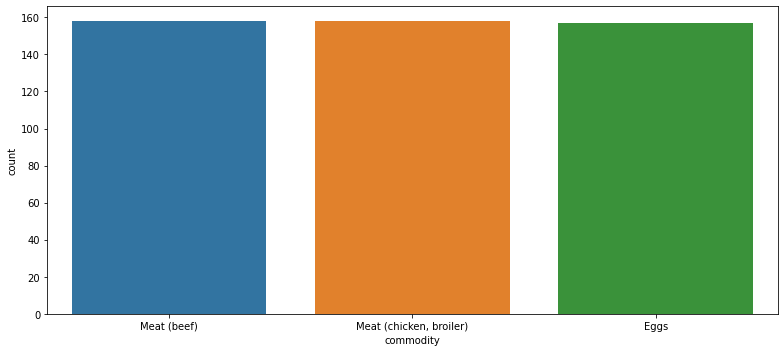

In [160]:
#Explore food category in dataset
plt.figure(figsize=(11,5))
sns.countplot(category2['commodity'], order = category2['commodity'].value_counts().index[::1])
plt.show()

### Trend Analysis: Moving Average

Creates 12 Month Moving Average

In [161]:

category2['Average'] = category2['price'].rolling(12).mean()
pd.options.mode.chained_assignment = None  # default='warn'
# plot the data and MA
import plotly.express as px
fig = px.line(category2, x="date", y=["price", "Average"], template = 'plotly_dark')
fig.show()


In [162]:
category2.describe()

,price,Average
count,473.000000,462.000000
mean,44645.777590,44726.319096
std,31072.926923,10271.750255
min,4299.000000,26095.461667
25%,20395.000000,35279.562500
50%,32947.000000,47141.291667
75%,61818.000000,55208.270833
max,109564.000000,59176.916667


**Observation:**
- The chart shows that the actual price (`price`) have trend and seasonality.
- Moving avareges (`averages`) give smoother line, but also shows same trend.
- Commodity prices in this category have rising trend through the years in range between IDR 4.299 to IDR 109.564
- Moving averages show the price keep moving up in range between IDR 26.095 in 2007 to in IDR 59.176 in 2020

### Prepare Data for Modelling

In [163]:
# extract month and year from dates**
pd.options.mode.chained_assignment = None  # default='warn'
category2['Month'] = [i.month for i in category2['date']]
category2['Year'] = [i.year for i in category2['date']]

# create a sequence of numbers
category2['Series'] = np.arange(1,len(category2)+1)

# drop unnecessary columns and re-arrange
category2.drop(['date', 'Average'], axis=1, inplace=True)
category2 = category2[['Series', 'Year', 'Month', 'category', 'commodity', 'unit', 'price']] 

# check the head of the dataset**
category2.tail()

,Series,Year,Month,category,commodity,unit,price
1646,469,2020,2,"meat, fish and eggs",Meat (beef),KG,109542.0
1647,470,2020,2,"meat, fish and eggs","Meat (chicken, broiler)",KG,43704.0
1655,471,2020,3,"meat, fish and eggs",Eggs,KG,24779.0
1656,472,2020,3,"meat, fish and eggs",Meat (beef),KG,109564.0
1657,473,2020,3,"meat, fish and eggs","Meat (chicken, broiler)",KG,43721.0


**Observation**: `date` has been extract to `Month`, `Year`, and `Series`

In [164]:
# split data into train-test set
train2 = category2[category2['Year'] <= 2018]
test2 = category2[category2['Year'] > 2018]

# check shape
train.shape, test.shape

((286, 8), (30, 8))

### Model #1 SES
Simple Exponential Smoothing

In [165]:

y_hat_avg = test2.copy()

#fit the model
fit2 = SimpleExpSmoothing(np.asarray(train2['price'])).fit(smoothing_level=0.8,optimized=False)

#forecast
y_hat_avg['SES'] = fit2.forecast(len(test2))
plt.figure(figsize=(16,8))

#Append train, test and forecast results
train2['Name'] ='Train'
test2['Name'] = 'Test'
x = train2.append(test2)
y = pd.DataFrame(y_hat_avg['SES'])
y['Name'] = 'SES'
y.rename(columns ={'SES':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()


<Figure size 1152x576 with 0 Axes>

In [166]:
#calculate root mean squared error
rms = sqrt(mean_squared_error(test2['price'], y_hat_avg.SES))
print('RMSE of Simple Exponential Smoothing: ', rms)

RMSE of Simple Exponential Smoothing:  37431.40947044485


### Model #2 HoltWinter

In [167]:
y_hat_avg = test2.copy()

#Fit the model
fit2 = ExponentialSmoothing(np.asarray(train2['price']),trend='add', seasonal='add', seasonal_periods=12,damped=False).fit()

#Forecast
y_hat_avg['HoltWinter'] = fit2.forecast(len(test2))
plt.figure(figsize=(16,8))

#Append train, test and forecast for visualization
train2['Name'] ='Train'
test2['Name'] = 'Test'
x = train2.append(test2)
y = pd.DataFrame(y_hat_avg['HoltWinter'])
y['Name'] = 'HoltWinter'
y.rename(columns ={'HoltWinter':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



<Figure size 1152x576 with 0 Axes>

In [168]:
#Check accuracy
rms = sqrt(mean_squared_error(test2['price'], y_hat_avg.HoltWinter))
print('RMSE of HoltWinter Model:', rms)

RMSE of HoltWinter Model: 7169.034584914435


### Model Evaluation

## Category 3: Milk and Dairy

### Creates Categorical Dataset

In [169]:
category3 = foodprice2[(foodprice2.market == "National Average") & (foodprice2.category == "milk and dairy")]
category3.head(10)

,date,market,category,commodity,unit,priceflag,pricetype,price
5,2007-01-15,National Average,milk and dairy,Milk (condensed),385 G,actual,Retail,5804.29
16,2007-02-15,National Average,milk and dairy,Milk (condensed),385 G,actual,Retail,5827.00
27,2007-03-15,National Average,milk and dairy,Milk (condensed),385 G,actual,Retail,5857.00
38,2007-04-15,National Average,milk and dairy,Milk (condensed),385 G,actual,Retail,5895.00
49,2007-05-15,National Average,milk and dairy,Milk (condensed),385 G,actual,Retail,5931.00
60,2007-06-15,National Average,milk and dairy,Milk (condensed),385 G,actual,Retail,6064.00
71,2007-07-15,National Average,milk and dairy,Milk (condensed),385 G,actual,Retail,6398.00
82,2007-08-15,National Average,milk and dairy,Milk (condensed),385 G,actual,Retail,6547.00
93,2007-09-15,National Average,milk and dairy,Milk (condensed),385 G,actual,Retail,6643.00
104,2007-10-15,National Average,milk and dairy,Milk (condensed),385 G,actual,Retail,6708.00


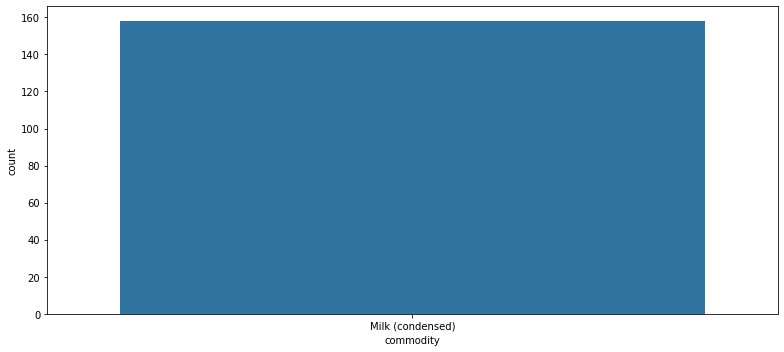

In [170]:
#Explore food category in dataset
plt.figure(figsize=(11,5))
sns.countplot(category3['commodity'], order = category3['commodity'].value_counts().index[::1])
plt.show()

### Creates 12 Month Moving Average

In [171]:
category3['Average'] = category3['price'].rolling(12).mean()
pd.options.mode.chained_assignment = None  # default='warn'
# plot the data and MA
import plotly.express as px
fig = px.line(category3, x="date", y=["price", "Average"], template = 'plotly_dark')
fig.show()


In [172]:
category3.describe()

,price,Average
count,158.000000,147.000000
mean,8632.811456,8656.921956
std,1388.749928,1283.601817
min,5804.290000,6266.190833
25%,7396.500000,7444.291667
50%,8300.000000,8349.916667
75%,9950.500000,9929.916667
max,10650.000000,10553.666667


### Prepare Data for Modelling

In [173]:
# extract month and year from dates
pd.options.mode.chained_assignment = None  # default='warn'
category3['Month'] = [i.month for i in category3['date']]
category3['Year'] = [i.year for i in category3['date']]

# create a sequence of numbers
category3['Series'] = np.arange(1,len(category3)+1)

# drop unnecessary columns and re-arrange
category3.drop(['date', 'Average'], axis=1, inplace=True)
category3 = category3[['Series', 'Year', 'Month', 'category', 'commodity', 'unit', 'price']] 

# check the head of the dataset**
category3.tail()

,Series,Year,Month,category,commodity,unit,price
1618,154,2019,11,milk and dairy,Milk (condensed),385 G,10567.0
1628,155,2019,12,milk and dairy,Milk (condensed),385 G,10623.0
1638,156,2020,1,milk and dairy,Milk (condensed),385 G,10622.0
1648,157,2020,2,milk and dairy,Milk (condensed),385 G,10634.0
1658,158,2020,3,milk and dairy,Milk (condensed),385 G,10650.0


In [174]:
# split data into train-test set
train3 = category3[category3['Year'] <= 2018]
test3 = category3[category3['Year'] > 2018]

# check shape
train.shape, test.shape

((286, 8), (30, 8))

### Model #1 SES
Simple Exponential Smoothing

In [175]:
y_hat_avg = test3.copy()

#fit the model
fit2 = SimpleExpSmoothing(np.asarray(train3['price'])).fit(smoothing_level=0.8,optimized=False)

#forecast
y_hat_avg['SES'] = fit2.forecast(len(test3))
plt.figure(figsize=(16,8))

#Append train, test and forecast results
train3['Name'] ='Train'
test3['Name'] = 'Test'
x = train3.append(test3)
y = pd.DataFrame(y_hat_avg['SES'])
y['Name'] = 'SES'
y.rename(columns ={'SES':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

<Figure size 1152x576 with 0 Axes>

In [176]:
#calculate root mean squared error
rms = sqrt(mean_squared_error(test3['price'], y_hat_avg.SES))
print('RMSE of Simple Exponential Smoothing: ', rms)

RMSE of Simple Exponential Smoothing:  295.2305154493328


### Model #2 HoltWinter

In [177]:
y_hat_avg = test3.copy()

#Fit the model
fit2 = ExponentialSmoothing(np.asarray(train3['price']),trend='add', seasonal='add', seasonal_periods=12,damped=False).fit()

#Forecast
y_hat_avg['HoltWinter'] = fit2.forecast(len(test3))
plt.figure(figsize=(16,8))

#Append train, test and forecast for visualization
train3['Name'] ='Train'
test3['Name'] = 'Test'
x = train3.append(test3)
y = pd.DataFrame(y_hat_avg['HoltWinter'])
y['Name'] = 'HoltWinter'
y.rename(columns ={'HoltWinter':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

<Figure size 1152x576 with 0 Axes>

In [178]:
#Check accuracy
rms = sqrt(mean_squared_error(test3['price'], y_hat_avg.HoltWinter))
print('RMSE of HoltWinter Model:', rms)

RMSE of HoltWinter Model: 140.79644799891256


## Category 4: Miscellaneous Food

### Creates Categorical Dataset

In [179]:
category4 = foodprice2[(foodprice2.market == "National Average") & (foodprice2.category == "miscellaneous food")]
category4.head(10)

,date,market,category,commodity,unit,priceflag,pricetype,price
6,2007-01-15,National Average,miscellaneous food,Sugar,KG,actual,Retail,6554.75
17,2007-02-15,National Average,miscellaneous food,Sugar,KG,actual,Retail,6598.00
28,2007-03-15,National Average,miscellaneous food,Sugar,KG,actual,Retail,6603.00
39,2007-04-15,National Average,miscellaneous food,Sugar,KG,actual,Retail,6645.00
50,2007-05-15,National Average,miscellaneous food,Sugar,KG,actual,Retail,6630.00
61,2007-06-15,National Average,miscellaneous food,Sugar,KG,actual,Retail,6579.00
72,2007-07-15,National Average,miscellaneous food,Sugar,KG,actual,Retail,6527.00
83,2007-08-15,National Average,miscellaneous food,Sugar,KG,actual,Retail,6575.00
94,2007-09-15,National Average,miscellaneous food,Sugar,KG,actual,Retail,6559.00
105,2007-10-15,National Average,miscellaneous food,Sugar,KG,actual,Retail,6545.00


**Observation**: Miscellaneous Food only consist of Sugar commodity

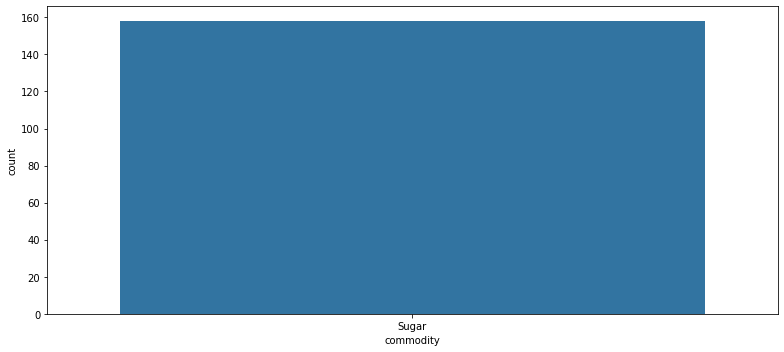

In [180]:
#Explore food category in dataset
plt.figure(figsize=(11,5))
sns.countplot(category4['commodity'], order = category4['commodity'].value_counts().index[::1])
plt.show()

### Creates 12 Month Moving Average

In [181]:

category4['Average'] = category4['price'].rolling(12).mean()
pd.options.mode.chained_assignment = None  # default='warn'
# plot the data and MA
import plotly.express as px
fig = px.line(category4, x="date", y=["price", "Average"], template = 'plotly_dark')
fig.show()


In [182]:
category4.describe()

,price,Average
count,158.00000,147.000000
mean,11186.47462,11293.275867
std,2452.00885,2294.536368
min,6478.00000,6530.000000
25%,10635.50000,10785.791667
50%,12028.50000,12102.750000
75%,12605.50000,12582.833333
max,15745.00000,14850.666667


### Prepare Data for Modelling

In [183]:
# extract month and year from dates
pd.options.mode.chained_assignment = None  # default='warn'
category4['Month'] = [i.month for i in category4['date']]
category4['Year'] = [i.year for i in category4['date']]

# create a sequence of numbers
category4['Series'] = np.arange(1,len(category3)+1)

# drop unnecessary columns and re-arrange
category4.drop(['date', 'Average'], axis=1, inplace=True)
category4 = category4[['Series', 'Year', 'Month', 'category', 'commodity', 'unit', 'price']] 

# check the head of the dataset**
category4.tail()

,Series,Year,Month,category,commodity,unit,price
1619,154,2019,11,miscellaneous food,Sugar,KG,12562.0
1629,155,2019,12,miscellaneous food,Sugar,KG,12619.0
1639,156,2020,1,miscellaneous food,Sugar,KG,12809.0
1649,157,2020,2,miscellaneous food,Sugar,KG,13008.0
1659,158,2020,3,miscellaneous food,Sugar,KG,14180.0


In [184]:
# split data into train-test set
train4 = category4[category4['Year'] <= 2018]
test4 = category4[category4['Year'] > 2018]

# check shape
train.shape, test.shape

((286, 8), (30, 8))

### Model #1 SES
Simple Exponential Smoothing

In [185]:
y_hat_avg = test4.copy()

#fit the model
fit2 = SimpleExpSmoothing(np.asarray(train4['price'])).fit(smoothing_level=0.8,optimized=False)

#forecast
y_hat_avg['SES'] = fit2.forecast(len(test4))
plt.figure(figsize=(16,8))

#Append train, test and forecast results
train4['Name'] ='Train'
test4['Name'] = 'Test'
x = train4.append(test4)
y = pd.DataFrame(y_hat_avg['SES'])
y['Name'] = 'SES'
y.rename(columns ={'SES':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

<Figure size 1152x576 with 0 Axes>

In [186]:
#calculate root mean squared error
rms = sqrt(mean_squared_error(test4['price'], y_hat_avg.SES))
print('RMSE of Simple Exponential Smoothing: ', rms)

RMSE of Simple Exponential Smoothing:  664.5272141998456


### Model #2 HoltWinter

In [187]:
y_hat_avg = test4.copy()

#Fit the model
fit2 = ExponentialSmoothing(np.asarray(train4['price']),trend='add', seasonal='add', seasonal_periods=12,damped=False).fit()

#Forecast
y_hat_avg['HoltWinter'] = fit2.forecast(len(test4))
plt.figure(figsize=(16,8))

#Append train, test and forecast for visualization
train4['Name'] ='Train'
test4['Name'] = 'Test'
x = train4.append(test4)
y = pd.DataFrame(y_hat_avg['HoltWinter'])
y['Name'] = 'HoltWinter'
y.rename(columns ={'HoltWinter':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

<Figure size 1152x576 with 0 Axes>

In [188]:
#Check accuracy
rms = sqrt(mean_squared_error(test4['price'], y_hat_avg.HoltWinter))
print('RMSE of HoltWinter Model:', rms)

RMSE of HoltWinter Model: 890.4312563272205


## Category 5: Non-Food

### Creates Categorical Dataset

In [189]:
category5 = foodprice2[(foodprice2.market == "National Average") & (foodprice2.category == "non-food")]
category5.head(10)

,date,market,category,commodity,unit,priceflag,pricetype,price
7,2007-01-15,National Average,non-food,Fuel (kerosene),L,actual,Retail,2874.0
18,2007-02-15,National Average,non-food,Fuel (kerosene),L,actual,Retail,2871.0
29,2007-03-15,National Average,non-food,Fuel (kerosene),L,actual,Retail,2861.0
40,2007-04-15,National Average,non-food,Fuel (kerosene),L,actual,Retail,2853.0
51,2007-05-15,National Average,non-food,Fuel (kerosene),L,actual,Retail,2853.0
62,2007-06-15,National Average,non-food,Fuel (kerosene),L,actual,Retail,2846.0
73,2007-07-15,National Average,non-food,Fuel (kerosene),L,actual,Retail,2839.0
84,2007-08-15,National Average,non-food,Fuel (kerosene),L,actual,Retail,3115.0
95,2007-09-15,National Average,non-food,Fuel (kerosene),L,actual,Retail,3019.0
106,2007-10-15,National Average,non-food,Fuel (kerosene),L,actual,Retail,2973.0


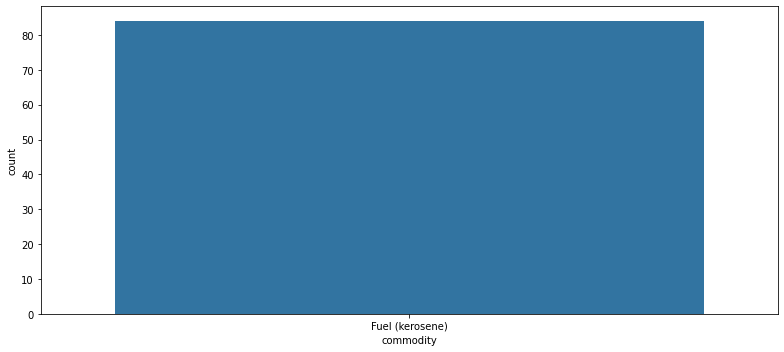

In [190]:
#Explore food category in dataset
plt.figure(figsize=(11,5))
sns.countplot(category5['commodity'], order = category5['commodity'].value_counts().index[::1])
plt.show()

### Creates 12 Month Moving Average

In [191]:
# create 12 month moving average
category5['Average'] = category5['price'].rolling(12).mean()
pd.options.mode.chained_assignment = None  # default='warn'
# plot the data and MA
import plotly.express as px
fig = px.line(category5, x="date", y=["price", "Average"], template = 'plotly_dark')
fig.show()

In [192]:
category5.describe()

,price,Average
count,84.000000,73.000000
mean,5104.790357,5186.414018
std,1171.781608,1015.641002
min,2839.000000,2907.750000
25%,4698.250000,4701.847500
50%,5643.000000,5632.083333
75%,6071.750000,6006.583333
max,6307.000000,6203.666667


### Prepare Data for Modelling

In [193]:
# extract month and year from dates**
pd.options.mode.chained_assignment = None  # default='warn'
category5['Month'] = [i.month for i in category5['date']]
category5['Year'] = [i.year for i in category5['date']]

# create a sequence of numbers
category5['Series'] = np.arange(1,len(category5)+1)

# drop unnecessary columns and re-arrange
category5.drop(['date', 'Average'], axis=1, inplace=True)
category5 = category5[['Series', 'Year', 'Month', 'category', 'commodity', 'unit', 'price']] 

# check the head of the dataset**
category5.tail()

,Series,Year,Month,category,commodity,unit,price
875,80,2013,8,non-food,Fuel (kerosene),L,6233.0
886,81,2013,9,non-food,Fuel (kerosene),L,6244.0
897,82,2013,10,non-food,Fuel (kerosene),L,6243.0
908,83,2013,11,non-food,Fuel (kerosene),L,6296.0
919,84,2013,12,non-food,Fuel (kerosene),L,6307.0


In [194]:
# split data into train-test set
train5 = category5[category5['Year'] <= 2011]
test5 = category5[category5['Year'] > 2011]

# check shape
train.shape, test.shape

((286, 8), (30, 8))

### Model #1 SES
Simple Exponential Smoothing

In [195]:
y_hat_avg = test5.copy()

#fit the model
fit2 = SimpleExpSmoothing(np.asarray(train5['price'])).fit(smoothing_level=0.8,optimized=False)

#forecast
y_hat_avg['SES'] = fit2.forecast(len(test5))
plt.figure(figsize=(16,8))

#Append train, test and forecast results
train5['Name'] ='Train'
test5['Name'] = 'Test'
x = train5.append(test5)
y = pd.DataFrame(y_hat_avg['SES'])
y['Name'] = 'SES'
y.rename(columns ={'SES':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

<Figure size 1152x576 with 0 Axes>

In [196]:
#calculate root mean squared error
rms = sqrt(mean_squared_error(test5['price'], y_hat_avg.SES))
print('RMSE of Simple Exponential Smoothing: ', rms)

RMSE of Simple Exponential Smoothing:  274.93150452465835


### Model #2 HoltWinter

In [197]:
y_hat_avg = test5.copy()

#Fit the model
fit2 = ExponentialSmoothing(np.asarray(train5['price']),trend='add', seasonal='add', seasonal_periods=12,damped=False).fit()

#Forecast
y_hat_avg['HoltWinter'] = fit2.forecast(len(test5))
plt.figure(figsize=(16,8))

#Append train, test and forecast for visualization
train5['Name'] ='Train'
test5['Name'] = 'Test'
x = train5.append(test5)
y = pd.DataFrame(y_hat_avg['HoltWinter'])
y['Name'] = 'HoltWinter'
y.rename(columns ={'HoltWinter':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

<Figure size 1152x576 with 0 Axes>

In [198]:
#Check accuracy
rms = sqrt(mean_squared_error(test5['price'], y_hat_avg.HoltWinter))
print('RMSE of HoltWinter Model:', rms)

RMSE of HoltWinter Model: 113.79205208189853


## Category 6: Oil and Fats

### Creates Categorical Dataset

In [199]:
category6 = foodprice2[(foodprice2.market == "National Average") & (foodprice2.category == "oil and fats")]
category6.head(10)

,date,market,category,commodity,unit,priceflag,pricetype,price
8,2007-01-15,National Average,oil and fats,Oil (vegetable),L,actual,Retail,8178.86
19,2007-02-15,National Average,oil and fats,Oil (vegetable),L,actual,Retail,8405.00
30,2007-03-15,National Average,oil and fats,Oil (vegetable),L,actual,Retail,8513.00
41,2007-04-15,National Average,oil and fats,Oil (vegetable),L,actual,Retail,8788.00
52,2007-05-15,National Average,oil and fats,Oil (vegetable),L,actual,Retail,9319.00
63,2007-06-15,National Average,oil and fats,Oil (vegetable),L,actual,Retail,9853.00
74,2007-07-15,National Average,oil and fats,Oil (vegetable),L,actual,Retail,10018.00
85,2007-08-15,National Average,oil and fats,Oil (vegetable),L,actual,Retail,10453.00
96,2007-09-15,National Average,oil and fats,Oil (vegetable),L,actual,Retail,10608.00
107,2007-10-15,National Average,oil and fats,Oil (vegetable),L,actual,Retail,10669.00


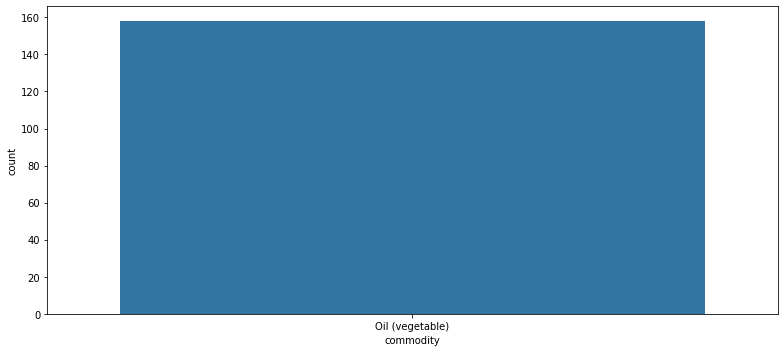

In [200]:
#Explore food category in dataset
plt.figure(figsize=(11,5))
sns.countplot(category6['commodity'], order = category6['commodity'].value_counts().index[::1])
plt.show()

### Creates 12 Month Moving Average

In [201]:
category6['Average'] = category6['price'].rolling(12).mean()
pd.options.mode.chained_assignment = None  # default='warn'
# plot the data and MA
import plotly.express as px
fig = px.line(category6, x="date", y=["price", "Average"], template = 'plotly_dark')
fig.show()

In [202]:
category6.describe()

,price,Average
count,158.000000,147.000000
mean,12937.404494,13028.950374
std,1396.979338,1126.480436
min,8178.860000,9710.488333
25%,12182.750000,12260.166667
50%,13154.000000,13095.583333
75%,13945.500000,13955.208333
max,14916.000000,14575.666667


### Prepare Data for Modelling

In [203]:
# extract month and year from dates**
pd.options.mode.chained_assignment = None  # default='warn'
category6['Month'] = [i.month for i in category6['date']]
category6['Year'] = [i.year for i in category6['date']]

# create a sequence of numbers
category6['Series'] = np.arange(1,len(category6)+1)

# drop unnecessary columns and re-arrange
category6.drop(['date', 'Average'], axis=1, inplace=True)
category6 = category6[['Series', 'Year', 'Month', 'category', 'commodity', 'unit', 'price']] 

# check the head of the dataset**
category6.tail()

,Series,Year,Month,category,commodity,unit,price
1620,154,2019,11,oil and fats,Oil (vegetable),L,13850.0
1630,155,2019,12,oil and fats,Oil (vegetable),L,14056.0
1640,156,2020,1,oil and fats,Oil (vegetable),L,14738.0
1650,157,2020,2,oil and fats,Oil (vegetable),L,14916.0
1660,158,2020,3,oil and fats,Oil (vegetable),L,14815.0


In [204]:
# split data into train-test set
train6 = category6[category6['Year'] <= 2018]
test6 = category6[category6['Year'] > 2018]

# check shape
train.shape, test.shape

((286, 8), (30, 8))

### Model #1 SES
Simple Exponential Smoothing

In [205]:
y_hat_avg = test6.copy()

#fit the model
fit2 = SimpleExpSmoothing(np.asarray(train6['price'])).fit(smoothing_level=0.8,optimized=False)

#forecast
y_hat_avg['SES'] = fit2.forecast(len(test6))
plt.figure(figsize=(16,8))

#Append train, test and forecast results
train6['Name'] ='Train'
test6['Name'] = 'Test'
x = train6.append(test6)
y = pd.DataFrame(y_hat_avg['SES'])
y['Name'] = 'SES'
y.rename(columns ={'SES':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

<Figure size 1152x576 with 0 Axes>

In [206]:
#calculate root mean squared error
rms = sqrt(mean_squared_error(test6['price'], y_hat_avg.SES))
print('RMSE of Simple Exponential Smoothing: ', rms)

RMSE of Simple Exponential Smoothing:  360.7474054114653


### Model #2 HoltWinter

In [207]:
y_hat_avg = test6.copy()

#Fit the model
fit2 = ExponentialSmoothing(np.asarray(train6['price']),trend='add', seasonal='add', seasonal_periods=12,damped=False).fit()

#Forecast
y_hat_avg['HoltWinter'] = fit2.forecast(len(test6))
plt.figure(figsize=(16,8))

#Append train, test and forecast for visualization
train6['Name'] ='Train'
test6['Name'] = 'Test'
x = train6.append(test6)
y = pd.DataFrame(y_hat_avg['HoltWinter'])
y['Name'] = 'HoltWinter'
y.rename(columns ={'HoltWinter':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

<Figure size 1152x576 with 0 Axes>

In [208]:
#Check accuracy
rms = sqrt(mean_squared_error(test6['price'], y_hat_avg.HoltWinter))
print('RMSE of HoltWinter Model:', rms)

RMSE of HoltWinter Model: 473.82773269768444


## Category 7: Vegetables and Fruits

### Creates Categorical Dataset

In [209]:
category7 = foodprice2[(foodprice2.market == "National Average") & (foodprice2.category == "vegetables and fruits")]
category7.head(10)

,date,market,category,commodity,unit,priceflag,pricetype,price
9,2007-01-15,National Average,vegetables and fruits,Chili (bird's eye),KG,actual,Retail,16825.12
10,2007-01-15,National Average,vegetables and fruits,Chili (red),KG,actual,Retail,24974.07
20,2007-02-15,National Average,vegetables and fruits,Chili (bird's eye),KG,actual,Retail,13373.00
21,2007-02-15,National Average,vegetables and fruits,Chili (red),KG,actual,Retail,22593.00
31,2007-03-15,National Average,vegetables and fruits,Chili (bird's eye),KG,actual,Retail,15360.00
32,2007-03-15,National Average,vegetables and fruits,Chili (red),KG,actual,Retail,22807.00
42,2007-04-15,National Average,vegetables and fruits,Chili (bird's eye),KG,actual,Retail,13347.00
43,2007-04-15,National Average,vegetables and fruits,Chili (red),KG,actual,Retail,18414.00
53,2007-05-15,National Average,vegetables and fruits,Chili (bird's eye),KG,actual,Retail,10784.00
54,2007-05-15,National Average,vegetables and fruits,Chili (red),KG,actual,Retail,14910.00


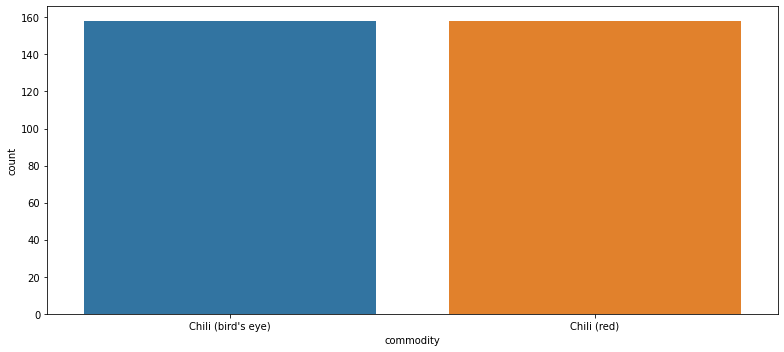

In [210]:
#Explore food category in dataset
plt.figure(figsize=(11,5))
sns.countplot(category7['commodity'], order = category7['commodity'].value_counts().index[::1])
plt.show()

### Creates 12 Month Moving Average

In [211]:
# create 12 month moving average
category7['Average'] = category7['price'].rolling(12).mean()
pd.options.mode.chained_assignment = None  # default='warn'
# plot the data and MA
import plotly.express as px
fig = px.line(category7, x="date", y=["price", "Average"], template = 'plotly_dark')
fig.show()

In [212]:
category7.describe()

,price,Average
count,316.000000,305.000000
mean,31294.636203,31210.597120
std,14103.235435,11205.645763
min,6349.000000,14770.083333
25%,19947.750000,21387.000000
50%,28923.000000,32253.833333
75%,38891.500000,37292.250000
max,89763.000000,61739.583333


### Prepare Data for Modelling

In [213]:
# extract month and year from dates**
pd.options.mode.chained_assignment = None  # default='warn'
category7['Month'] = [i.month for i in category7['date']]
category7['Year'] = [i.year for i in category7['date']]

# create a sequence of numbers
category7['Series'] = np.arange(1,len(category7)+1)

# drop unnecessary columns and re-arrange
category7.drop(['date', 'Average'], axis=1, inplace=True)
category7 = category7[['Series', 'Year', 'Month', 'category', 'commodity', 'unit', 'price']] 

# check the head of the dataset**
category7.tail()

,Series,Year,Month,category,commodity,unit,price
1642,312,2020,1,vegetables and fruits,Chili (red),KG,6349.0
1651,313,2020,2,vegetables and fruits,Chili (bird's eye),KG,67821.0
1652,314,2020,2,vegetables and fruits,Chili (red),KG,71312.0
1661,315,2020,3,vegetables and fruits,Chili (bird's eye),KG,55722.0
1662,316,2020,3,vegetables and fruits,Chili (red),KG,59496.0


In [214]:
# split data into train-test set
train7 = category7[category7['Year'] <= 2018]
test7 = category7[category7['Year'] > 2018]

# check shape
train.shape, test.shape

((286, 8), (30, 8))

### Model #1 SES
Simple Exponential Smoothing



In [215]:
y_hat_avg = test7.copy()

#fit the model
fit2 = SimpleExpSmoothing(np.asarray(train7['price'])).fit(smoothing_level=0.8,optimized=False)

#forecast
y_hat_avg['SES'] = fit2.forecast(len(test7))
plt.figure(figsize=(16,8))

#Append train, test and forecast results
train7['Name'] ='Train'
test7['Name'] = 'Test'
x = train7.append(test7)
y = pd.DataFrame(y_hat_avg['SES'])
y['Name'] = 'SES'
y.rename(columns ={'SES':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

<Figure size 1152x576 with 0 Axes>

In [216]:
#calculate root mean squared error
rms = sqrt(mean_squared_error(test7['price'], y_hat_avg.SES))
print('RMSE of Simple Exponential Smoothing: ', rms)

RMSE of Simple Exponential Smoothing:  20639.03066899964


### Model #2 HoltWinter

In [217]:
y_hat_avg = test7.copy()

#Fit the model
fit2 = ExponentialSmoothing(np.asarray(train7['price']),trend='add', seasonal='add', seasonal_periods=12,damped=False).fit()

#Forecast
y_hat_avg['HoltWinter'] = fit2.forecast(len(test7))
plt.figure(figsize=(16,8))

#Append train, test and forecast for visualization
train7['Name'] ='Train'
test7['Name'] = 'Test'
x = train7.append(test7)
y = pd.DataFrame(y_hat_avg['HoltWinter'])
y['Name'] = 'HoltWinter'
y.rename(columns ={'HoltWinter':'price'}, inplace = True )
z= x.append(y)
z
fig = px.line(z, x=z.index, y="price", color='Name')
fig.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



<Figure size 1152x576 with 0 Axes>

In [218]:
#Check accuracy
rms = sqrt(mean_squared_error(test7['price'], y_hat_avg.HoltWinter))
print('RMSE of HoltWinter Model:', rms)

RMSE of HoltWinter Model: 19947.403593358584
